In [1]:
import torch
from transformers import AutoModelForCausalLM

target_model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    torch_dtype = torch.bfloat16,
    device_map = "cuda"
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
q_proj_tensor = target_model.model.layers[0].self_attn.v_proj.weight
flattened_weights = torch.flatten(q_proj_tensor).cpu().half().detach().numpy()

/tmp/ipykernel_3560/3558575327.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_sample)


<Axes: ylabel='Density'>

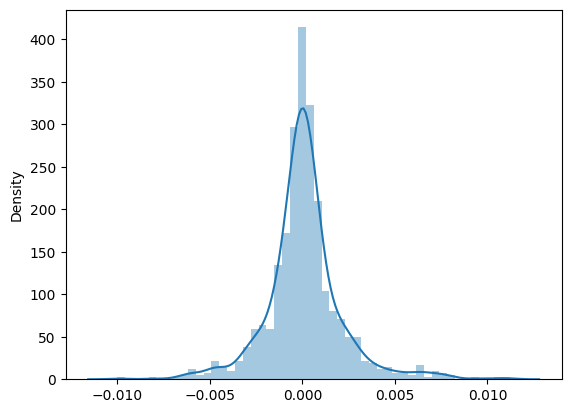

In [24]:
import seaborn as sns
import numpy as np

weights_sample = np.random.choice(flattened_weights, size = 1000)

sns.distplot(weights_sample)

In [ ]:
mask = torch.abs(torch.flatten(q_proj_tensor)) >= 1e-04
indices = torch.nonzero(mask)
indices.shape


torch.Size([4161313, 1])

In [26]:
torch.flatten(q_proj_tensor).shape

torch.Size([4194304])

In [27]:
(torch.flatten(q_proj_tensor).shape[0] - indices.shape[0]) / torch.flatten(q_proj_tensor).shape[0]

0.007865667343139648